# Zillow- Exporatory data analysis

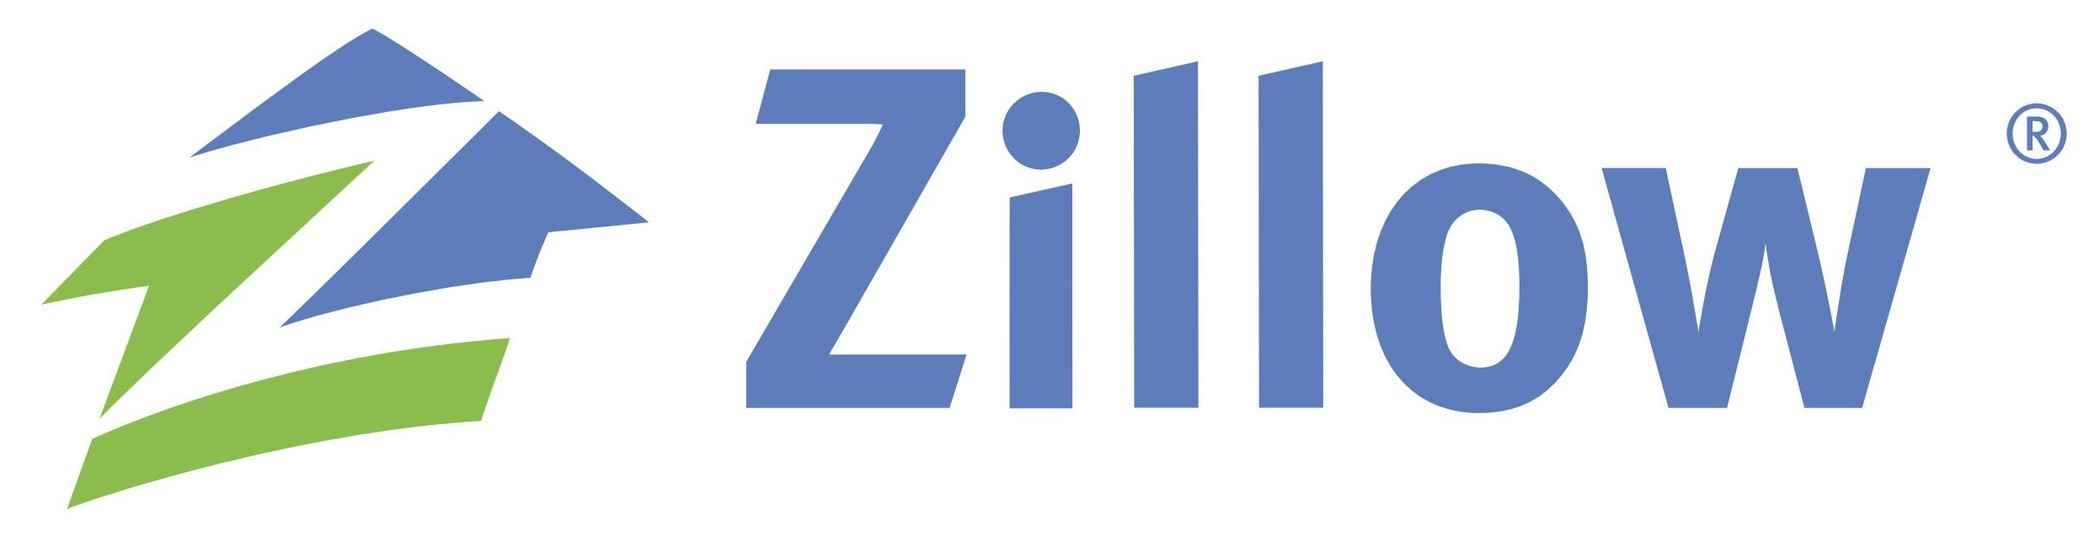

This is the exploratory element of the Zillow 2017 predictions dataset.  This is the first document, which is accompanied by the modeling notebook and final report notebook.   

## Purpose
The purpose of this notebook is to explore the data to identify which variables are primarily responsible for the changes in home prices from the data set.

### Goal/Aim
 - Your goal is to predict the values of single unit properties using the observations from 2017.
 - Find which features variable pairs impact values
 - Find which categorical and continuous variables impact value

## Methodology
Look at individual variables (univariate analysis)
Look at variables compared to each other (bivariate analysis)
Look at all variables compared to all other variables (multivariate analysis)


# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from itertools import combinations

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply

import matplotlib.pyplot as plt


## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths available on github
import os
import imports
import wrangle
import explore
import model
from prepare import train_validate_test_split
import env


# Data import
- Data is imported via python from a the Codeup SQL database.  See data Dictionary for what data was imported.

In [3]:
# pull in data
df = wrangle.wrangle_zillow()
# Initial look to make sure all wrangling took place
df.head()

Using cached csv


,parcel,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,fed_code,age,living_space
0,14297519,4,3,3100,2,0,4506,1998,1023282,6059,19,2180
1,17052889,2,1,1465,1,0,12647,1967,464000,6111,50,1025
2,14186244,3,2,1243,2,1,8432,1962,564778,6059,55,563
3,12177905,4,3,2376,0,1,13038,1970,145143,6037,47,1456
4,12095076,4,3,2962,0,1,63000,1950,773303,6037,67,2042


In [4]:
def get_locations_from_fed_code(fip):
    if int(fip) == 6037:
        return "LA County"
    if int(fip) == 6059:
        return "Orange County"
    if int(fip) == 6111:
        return "Ventura County"

In [5]:
df["county"] = np.select([df.fed_code == 6037, df.fed_code==6059, df.fed_code == 6111],["LA County", "Orange County", "Ventura County"])
df["county"] = df.fed_code.apply(lambda x: get_locations_from_fed_code(x))
df.county.value_counts(), df.shape

(LA County         32549
 Orange County     13601
 Ventura County     4294
 Name: county, dtype: int64,
 (50444, 13))

# Data processing
 - Data was wrangled
     - age and living space were created
     - pool and garage had null values filled with 0
     - All other na values were dropped from dataset
     - Most columns were converted to int64
     - Homes with more than 6 bedrooms or 6 bathrooms, over $2M, or over 4 garages were dropped from dataset

### Split the data Here!
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [6]:
# Split data
train, validate, test = train_validate_test_split(df, seed=123)

train --> (28248, 13)
validate --> (12107, 13)
test --> (10089, 13)


In [7]:
# Look at data
train.head()

,parcel,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,fed_code,age,living_space,county
14733,12890013,2,2,913,0,0,2772,1985,132267,6037,32,433,LA County
15170,11970736,3,2,1665,0,0,6760,1959,871083,6037,58,985,LA County
21158,12125956,2,2,2033,0,0,10650,1949,672576,6037,68,1553,LA County
29556,14505703,3,3,2252,2,1,6000,1992,479243,6059,25,1532,Orange County
3648,11128434,4,3,2552,0,0,10526,1969,686553,6037,48,1632,LA County


In [8]:
train.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built', 'tax_value', 'fed_code', 'age',
       'living_space', 'county'],
      dtype='object')

# Exploritory Data Analysis
General Goal of EDA
***
## Univariate Analysis
- Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
- Descriptive statistics describe and summarize data. Univariate descriptive statistics describe individual variables.
Describe which variables will be used
Describe what is expected why this may be important

Factors to consider
   - Grouped Data (Bins or categories)
   - Frequency
   - Cumulative data Column
   - Percentage distirbution

Visualization 
 - Bar
 - Histogram
 - Frequency 
 - Pie

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [9]:
# Creating feature categories for analysis
categorical = ['bedrooms', 'bathrooms','garage', 'pool','county']
continuous = ['square_feet','lot_size','year_built', 'tax_value','age', 'living_space']
columns = ['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built', 'tax_value', 'fed_code', 'age',
       'living_space']
# For analysis based on tax_value and county
categorical_to_analyze = ['tax_value','county','bedrooms', 'bathrooms','garage', 'pool']
continuous_to_analyze = ['tax_value','county','square_feet','lot_size','year_built', 'tax_value','age', 'living_space']

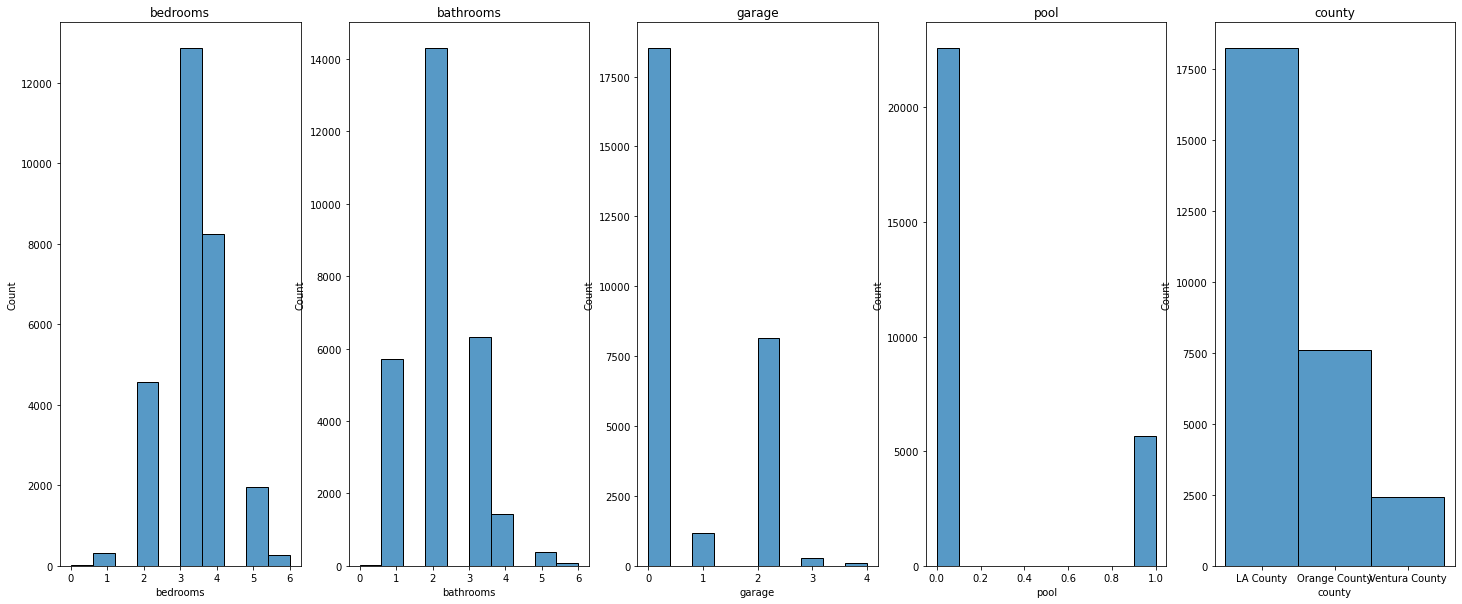

In [10]:
explore.plot_histograms(train, categorical)

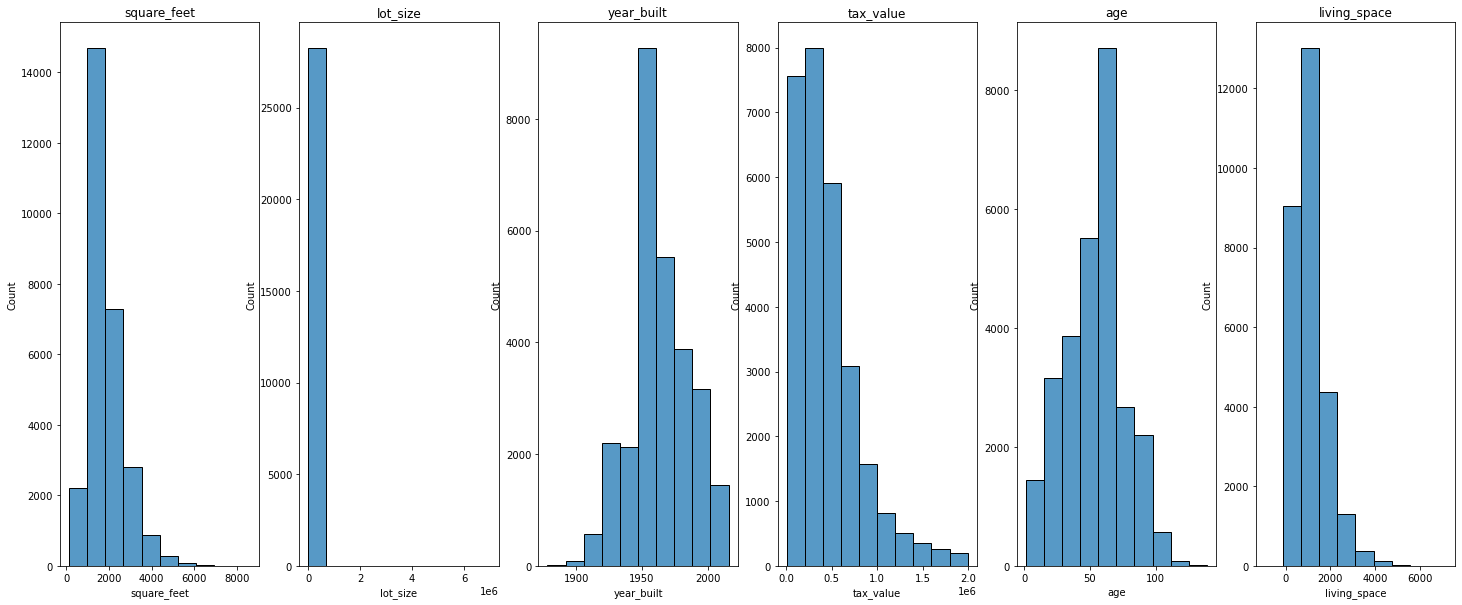

In [11]:
explore.plot_histograms(train, continuous)

## Bivariate analysis
- Bivariate analysis means the analysis of the bivariate data. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. The variables that are involved are X and Y.

Describe which variables will be used <br>
Describe what is expected why this may be important

Use:
- Scatter plots – This gives an idea of the patterns that can be formed using the two variables
- Regression Analysis – This uses a wide range of tools to determine how the data post could be related. The post may follow an exponential curve. The regression analysis gives the equation for a line or curve. It also helps to find the correlation coefficient.
- Correlation Coefficients – The coefficient lets you know if the data in question are related. When the correlation coefficient is zero then this means that the variables are not related. If the correlation coefficient is a positive or a negative 1 then this means that the variables are perfectly correlated.

Factors to consider


Tests for comparison

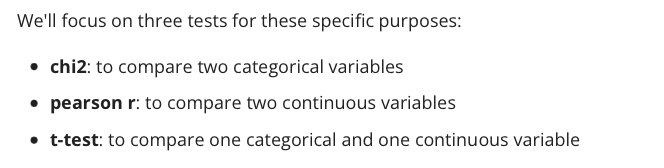

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

Generating plots square_feet by bedrooms


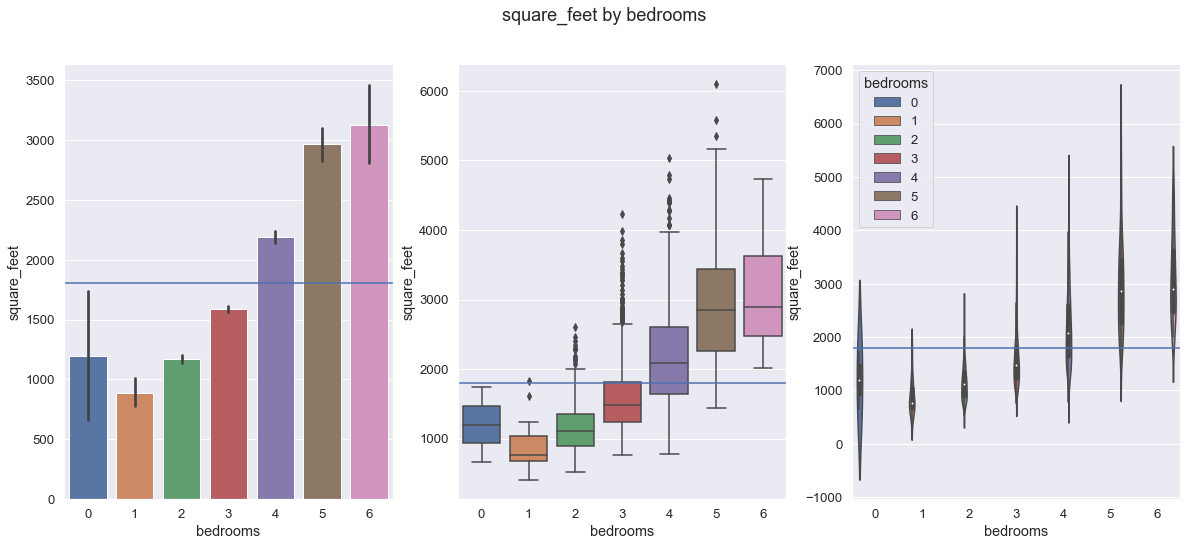

Generating plots square_feet by bathrooms


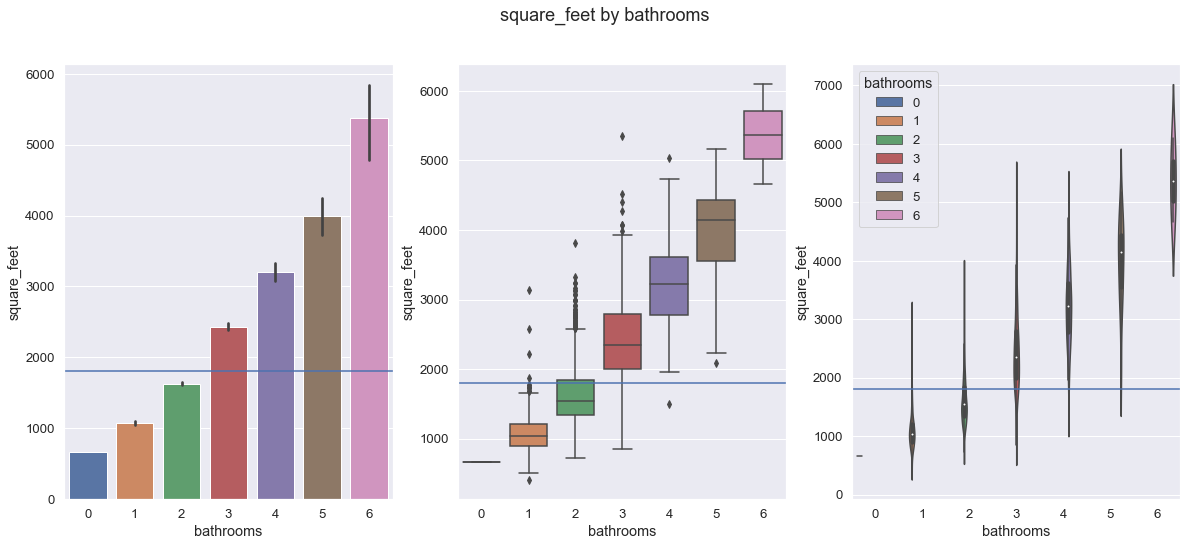

Generating plots square_feet by garage


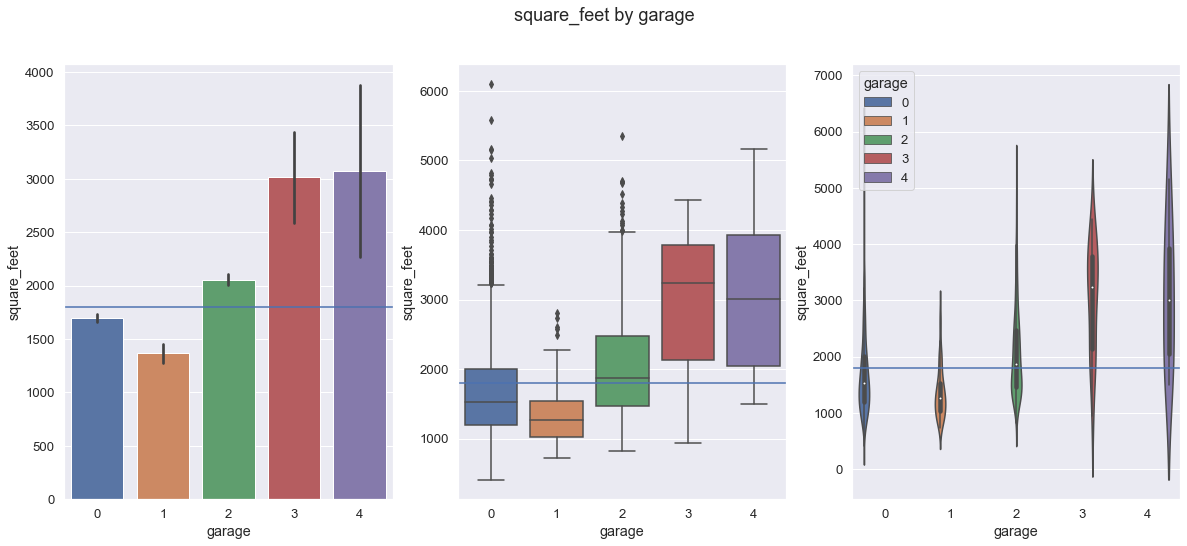

Generating plots square_feet by pool


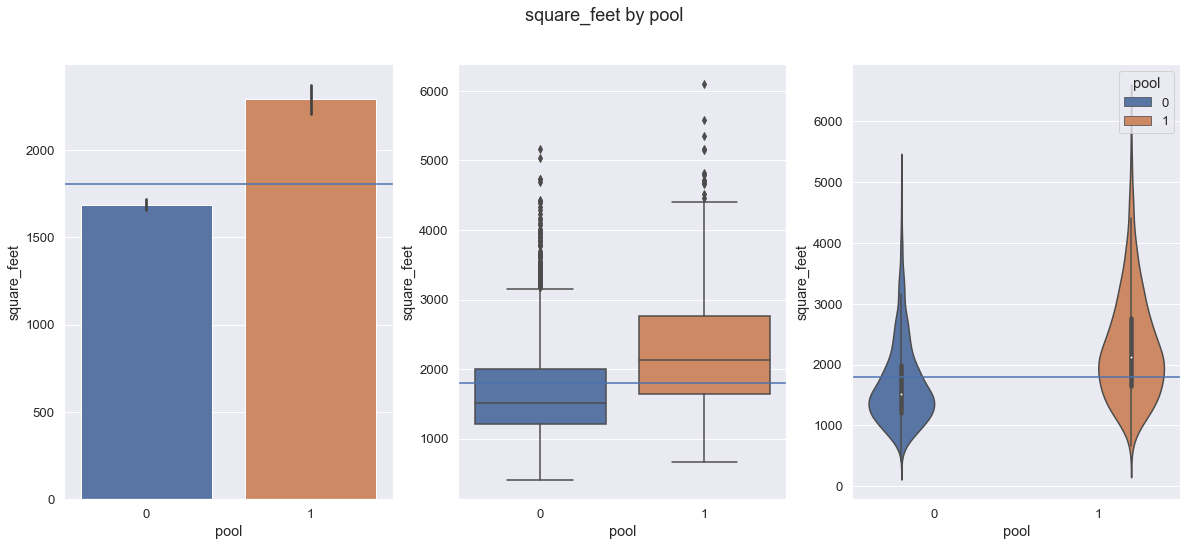

Generating plots square_feet by county


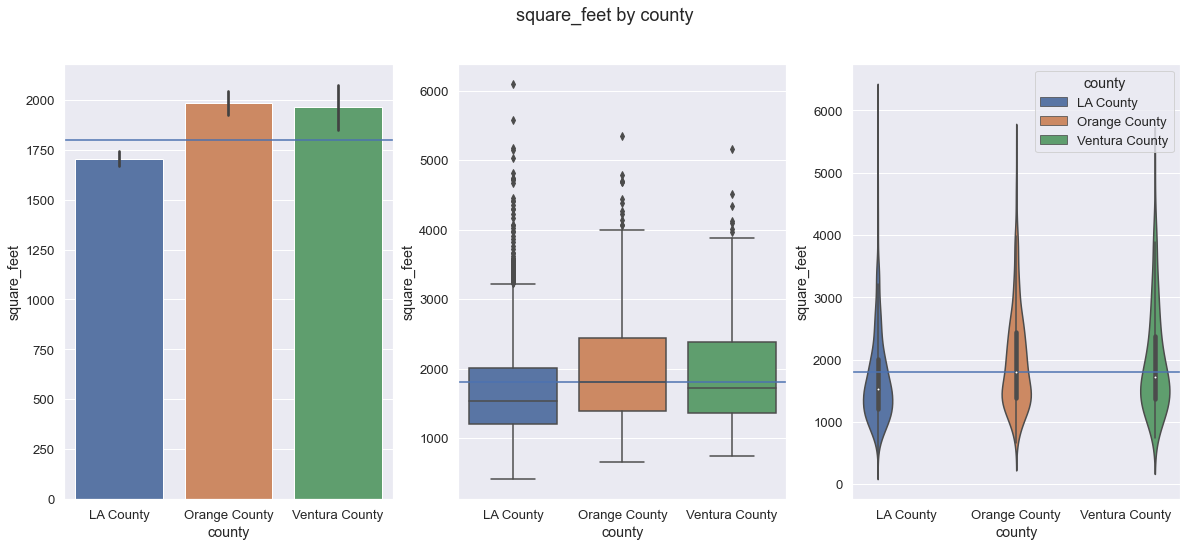

Generating plots lot_size by bedrooms


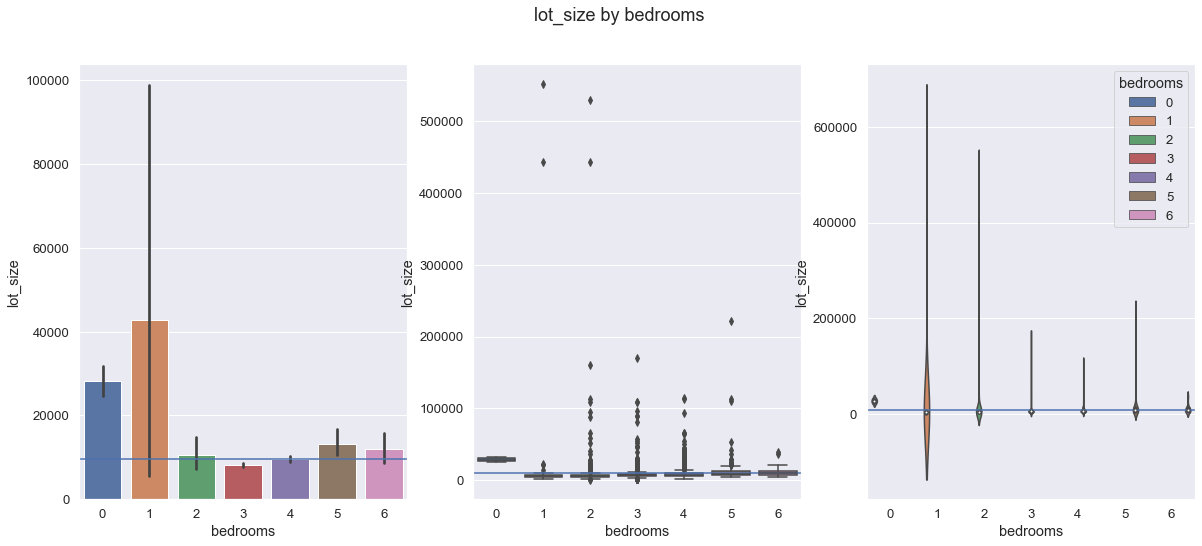

Generating plots lot_size by bathrooms


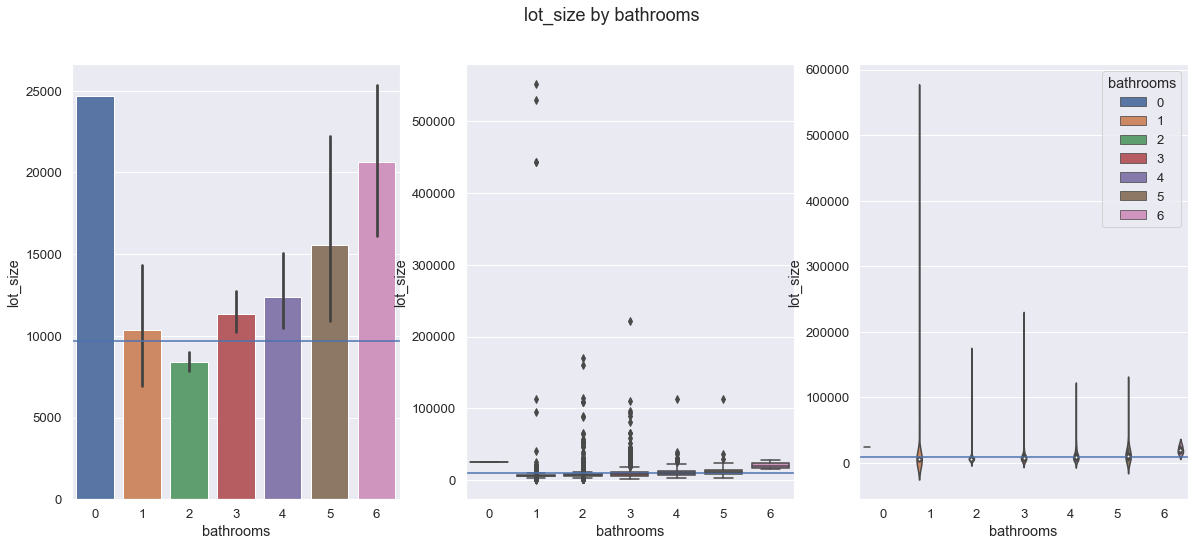

Generating plots lot_size by garage


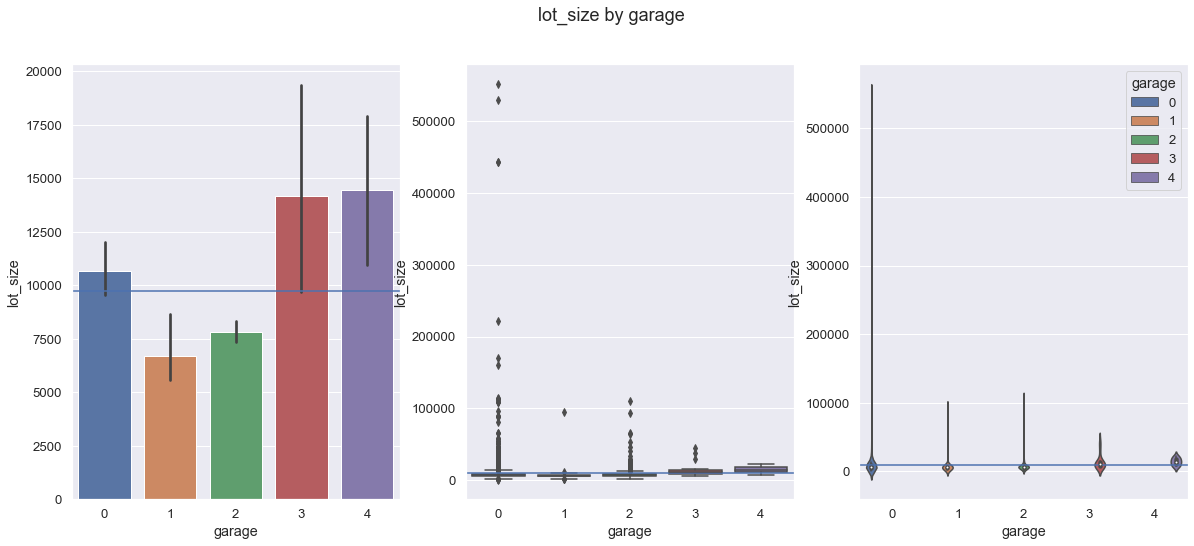

Generating plots lot_size by pool


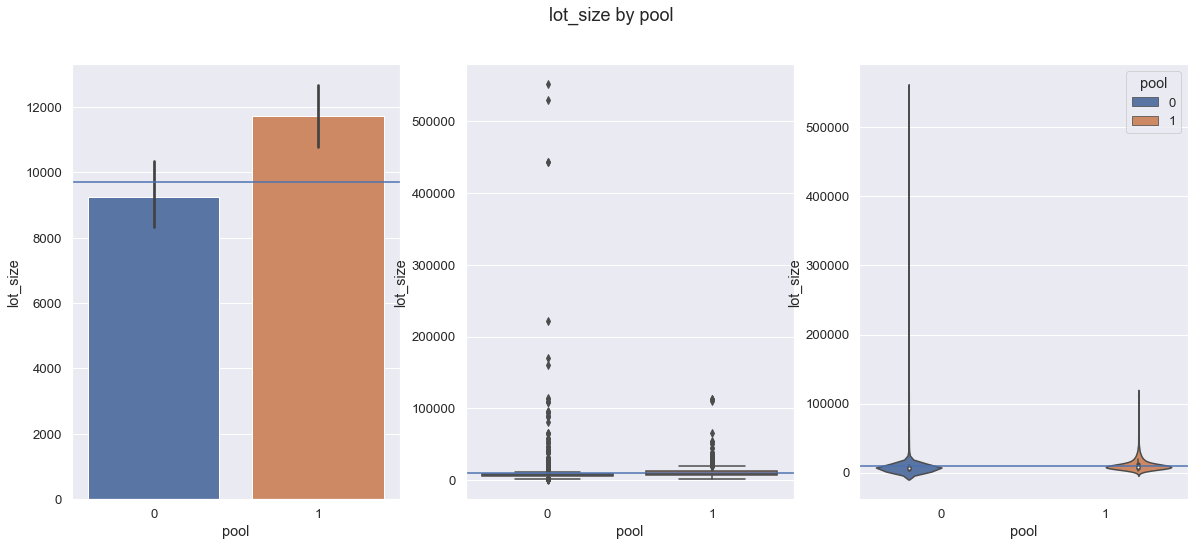

Generating plots lot_size by county


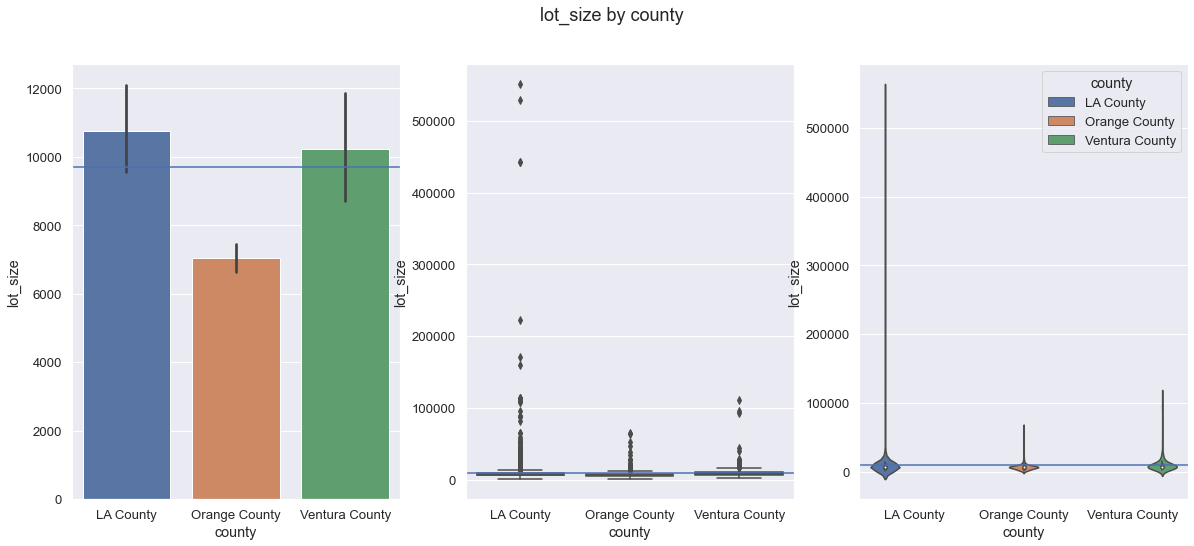

Generating plots year_built by bedrooms


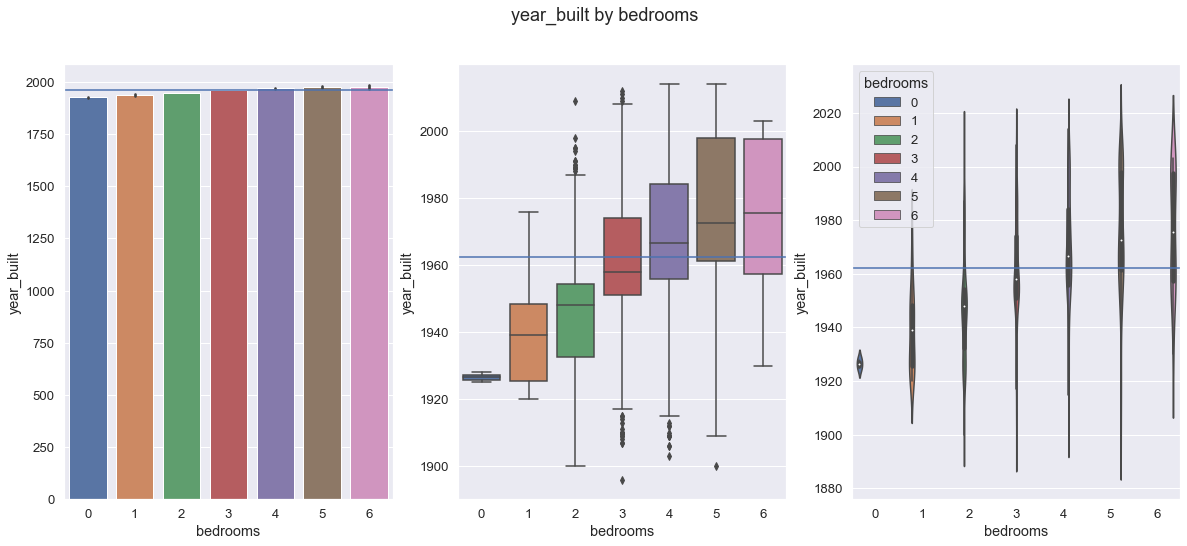

Generating plots year_built by bathrooms


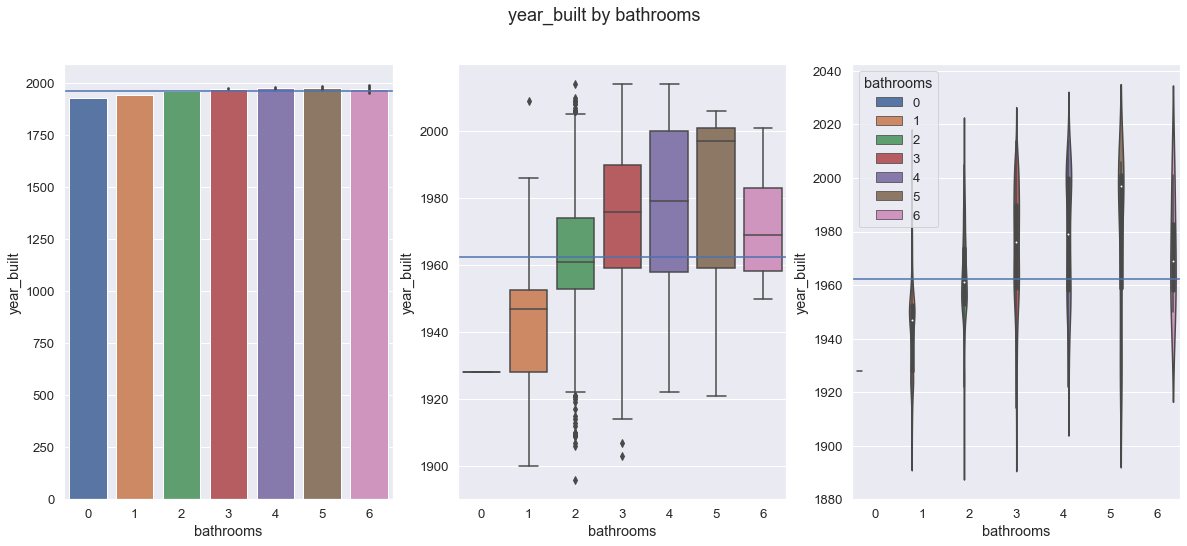

Generating plots year_built by garage


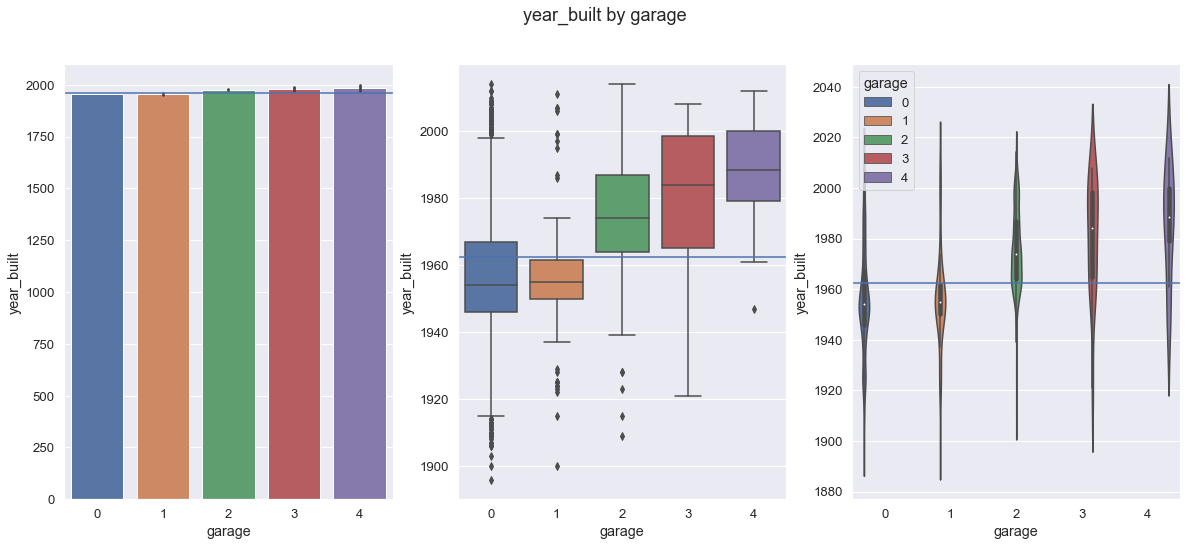

Generating plots year_built by pool


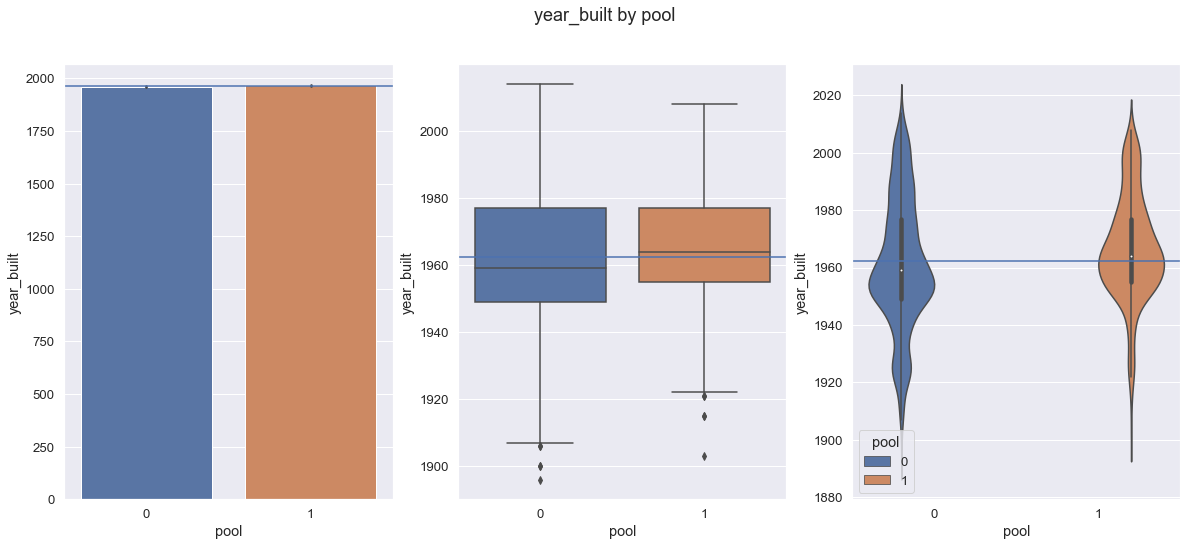

Generating plots year_built by county


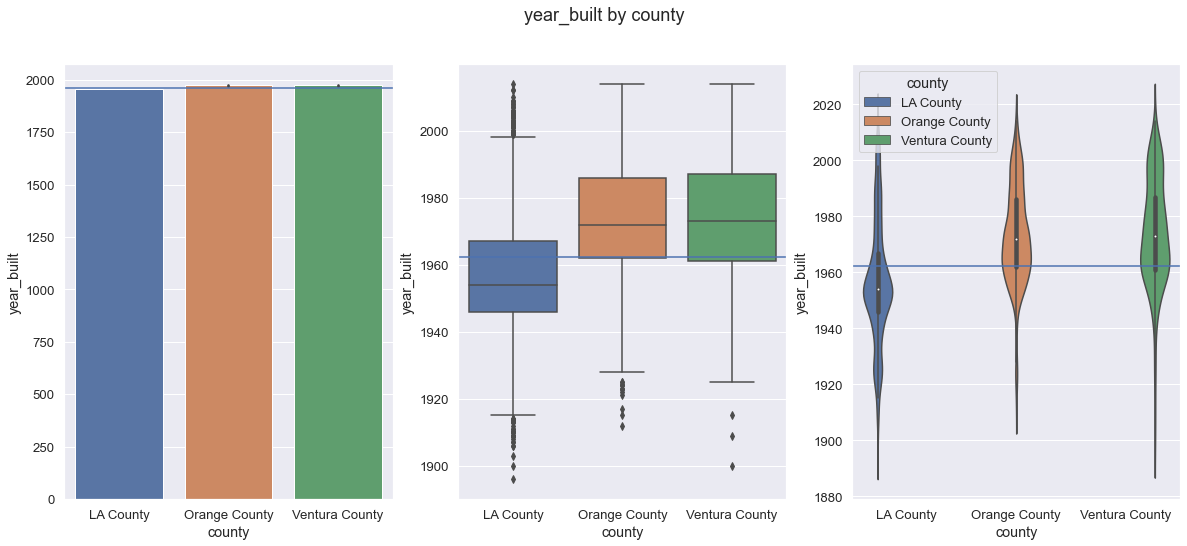

Generating plots tax_value by bedrooms


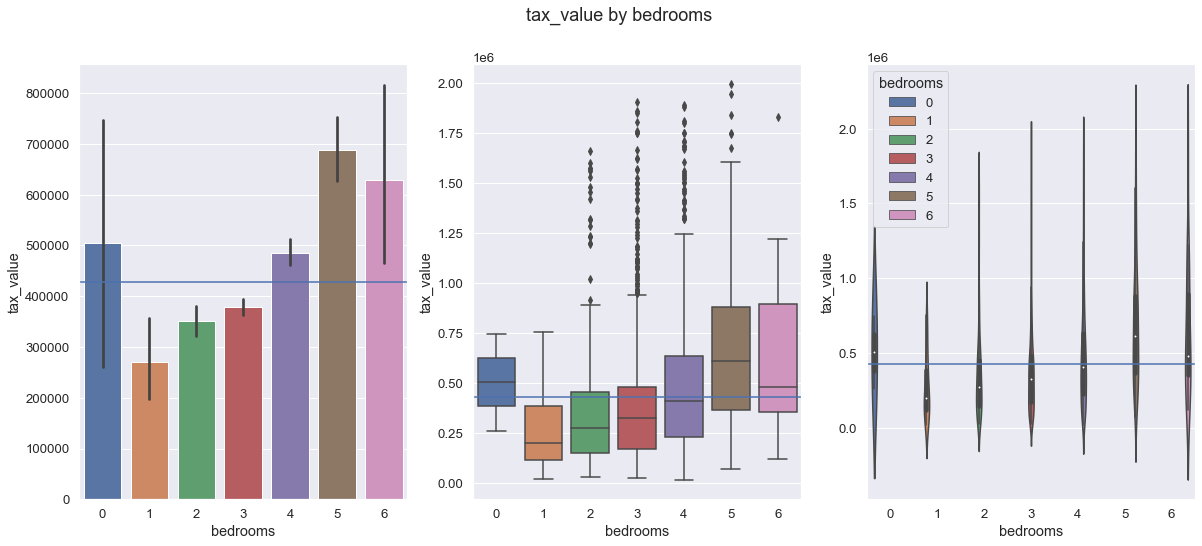

Generating plots tax_value by bathrooms


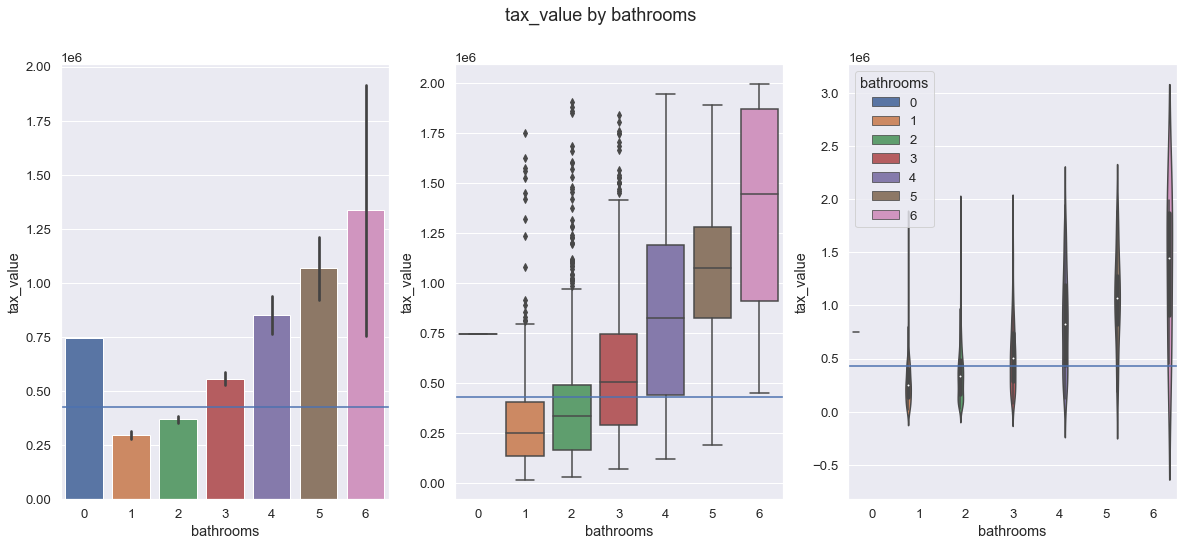

Generating plots tax_value by garage


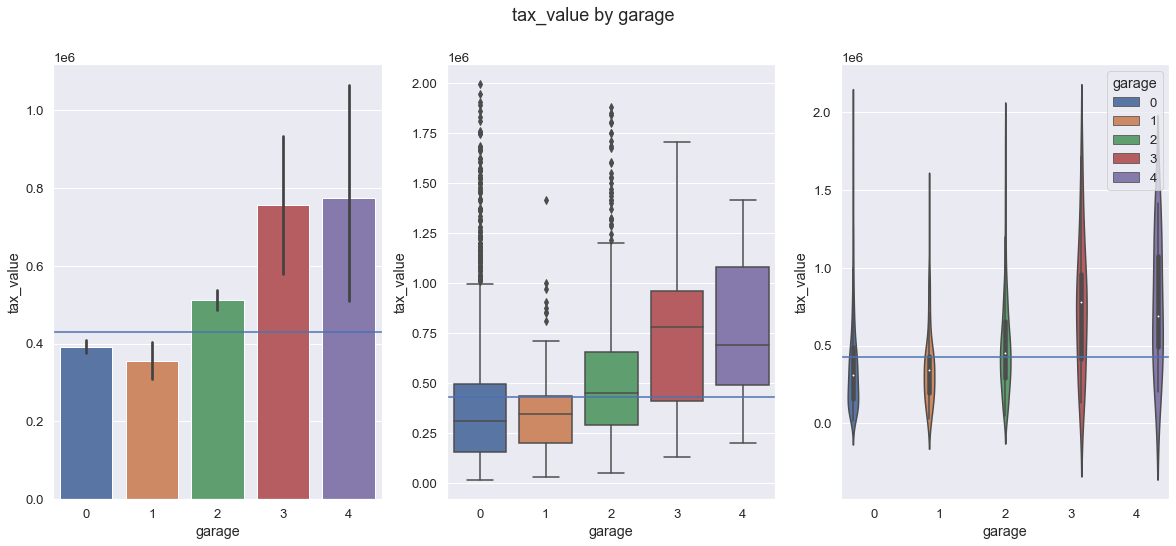

Generating plots tax_value by pool


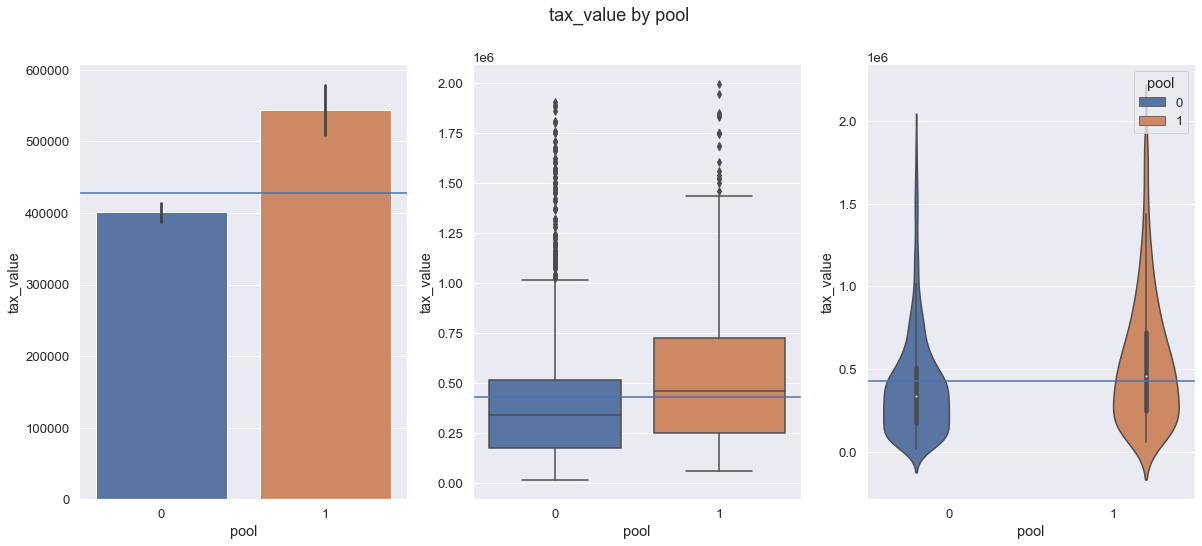

Generating plots tax_value by county


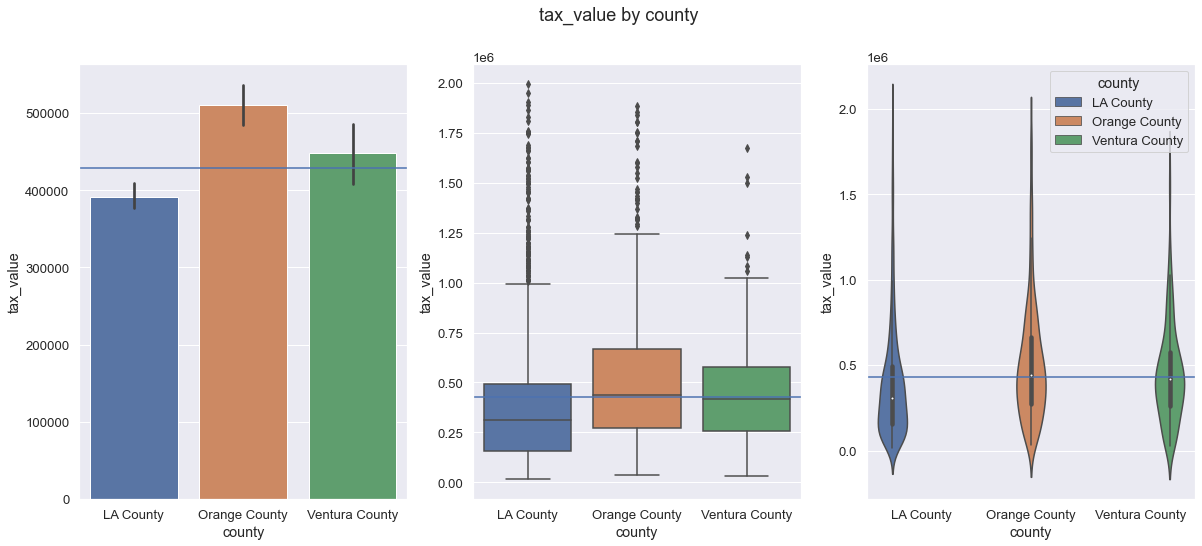

Generating plots age by bedrooms


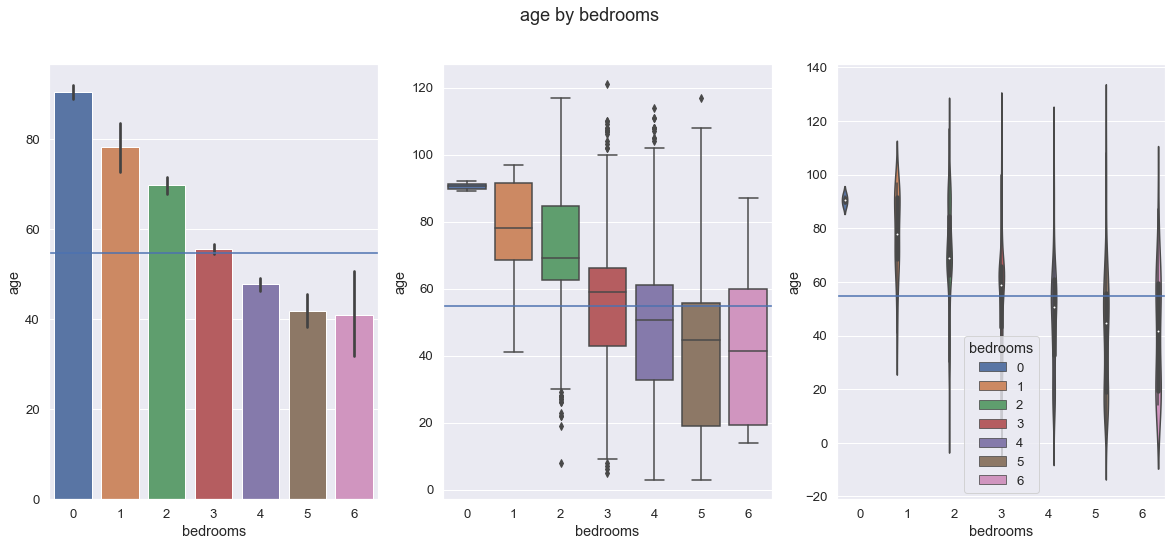

Generating plots age by bathrooms


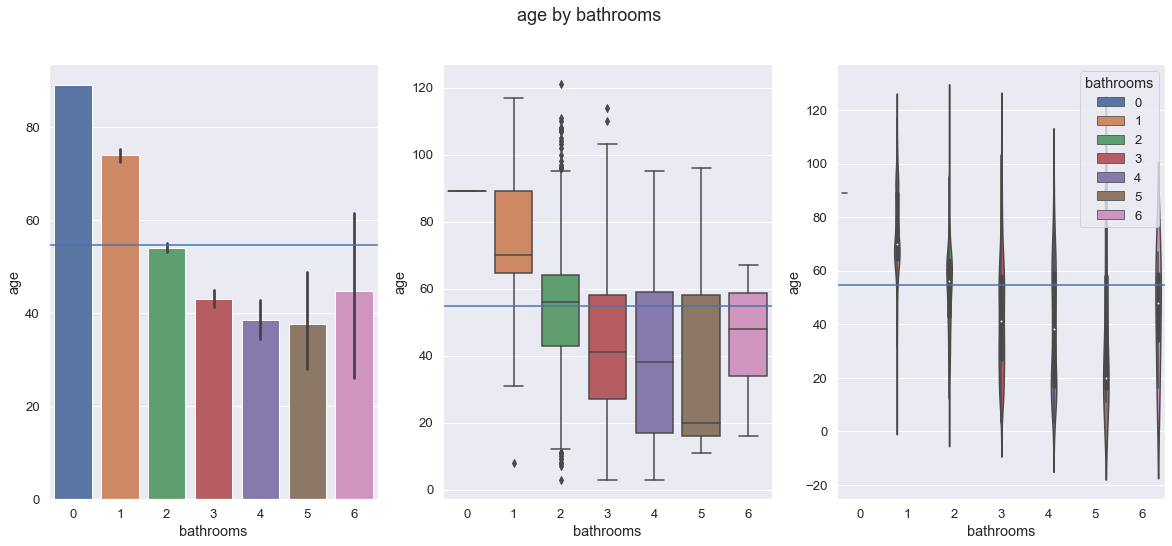

Generating plots age by garage


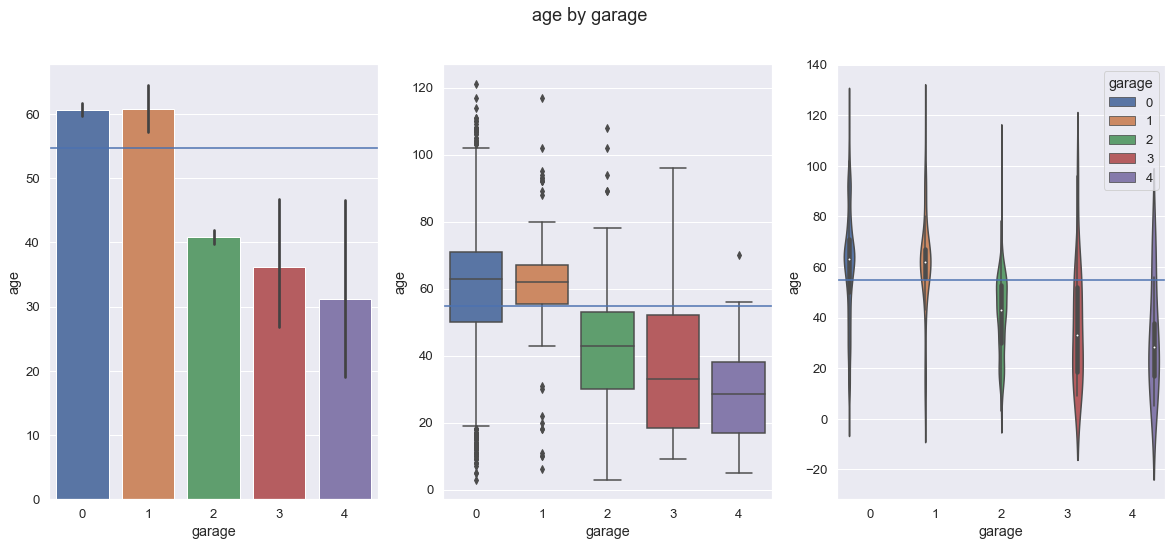

Generating plots age by pool


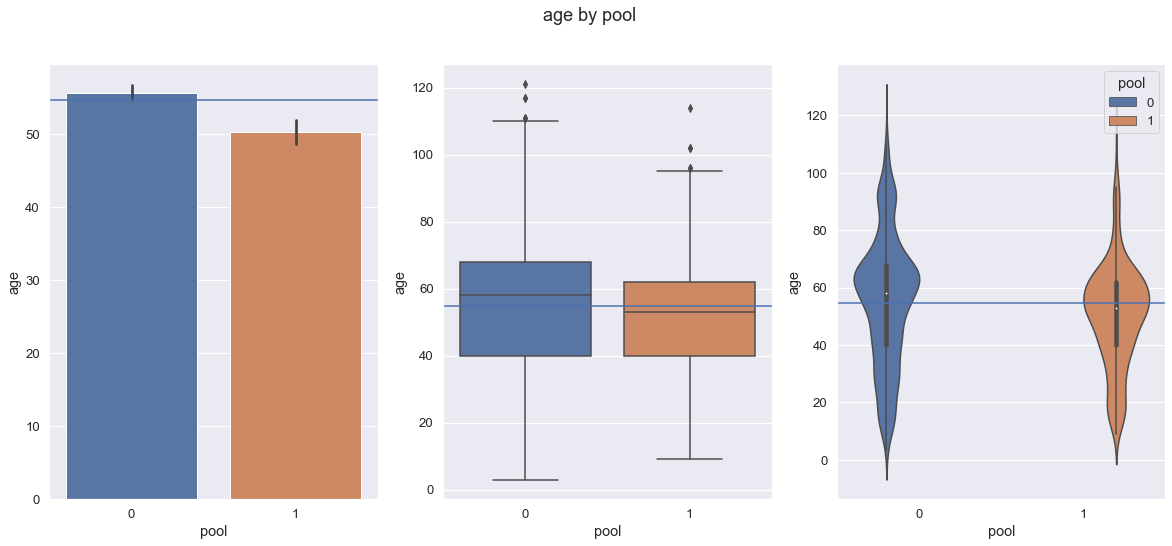

Generating plots age by county


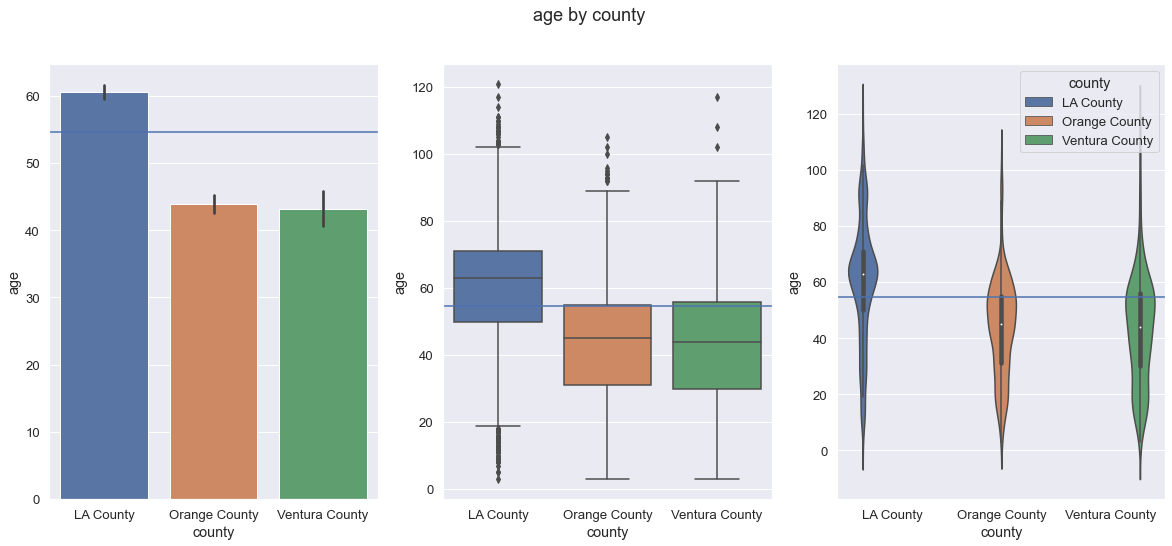

Generating plots living_space by bedrooms


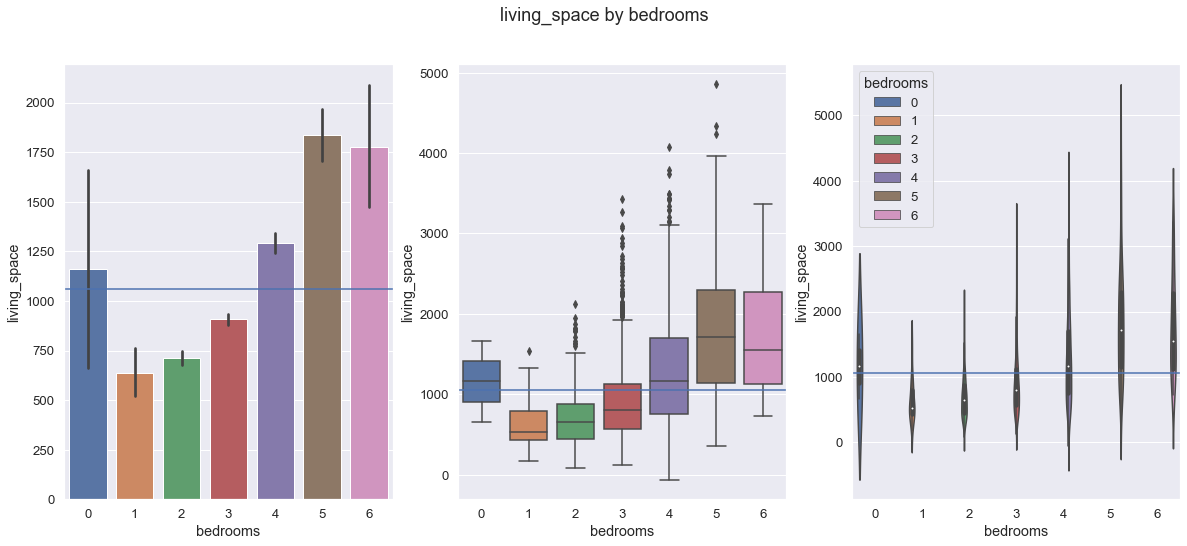

Generating plots living_space by bathrooms


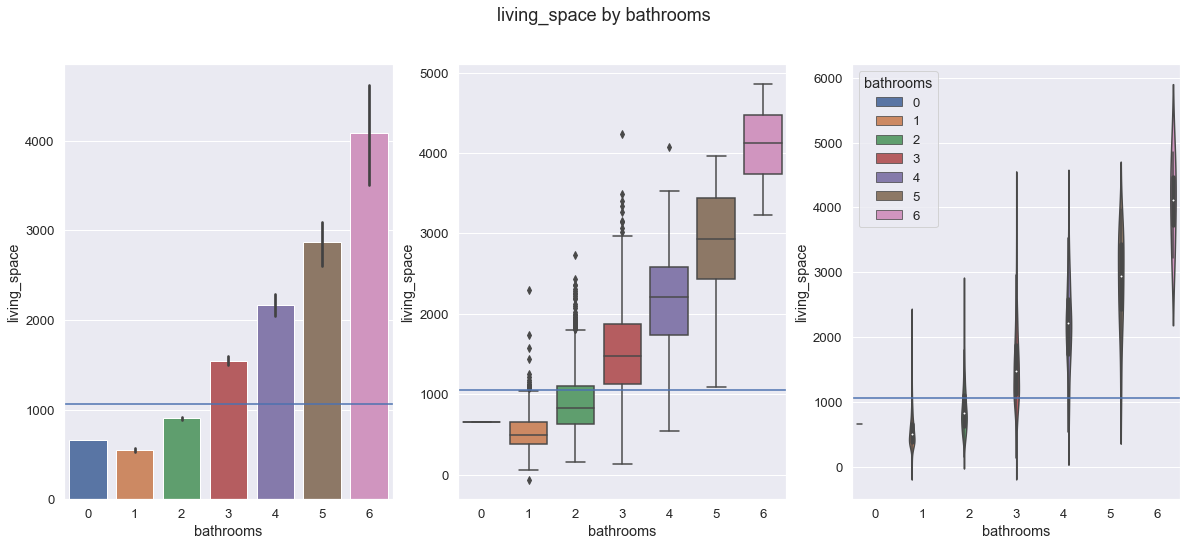

Generating plots living_space by garage


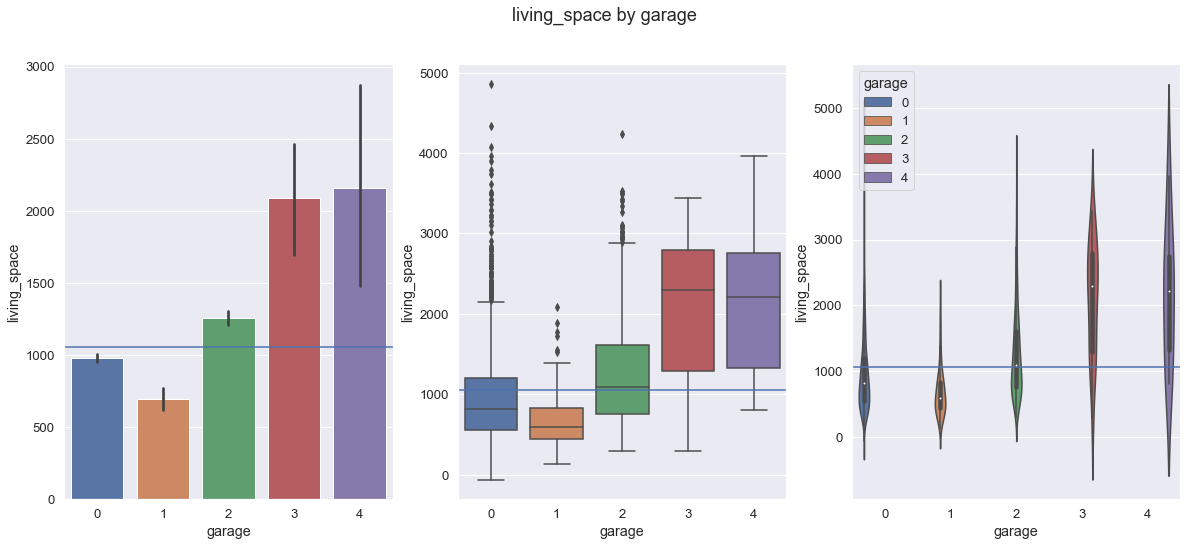

Generating plots living_space by pool


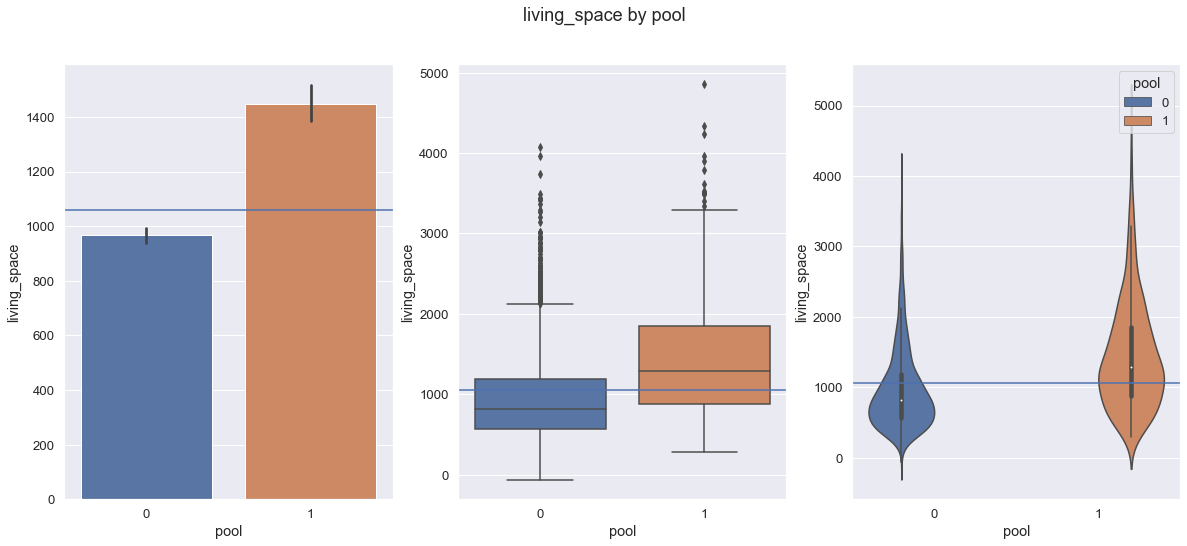

Generating plots living_space by county


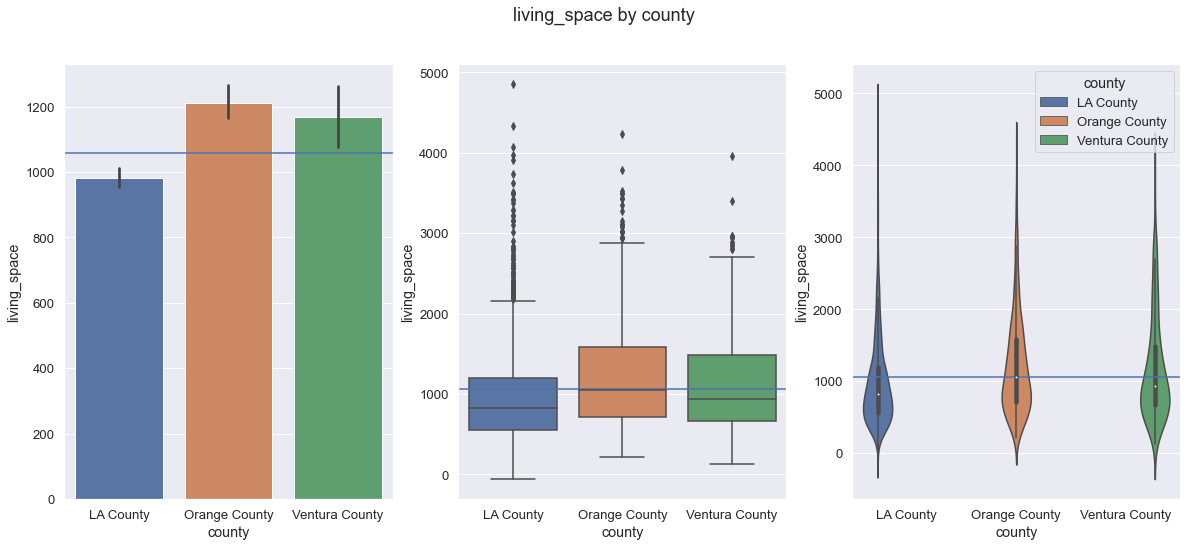

In [12]:
explore.plot_categorical_and_continuous_vars(train, categorical, continuous, sample_amt=2500)

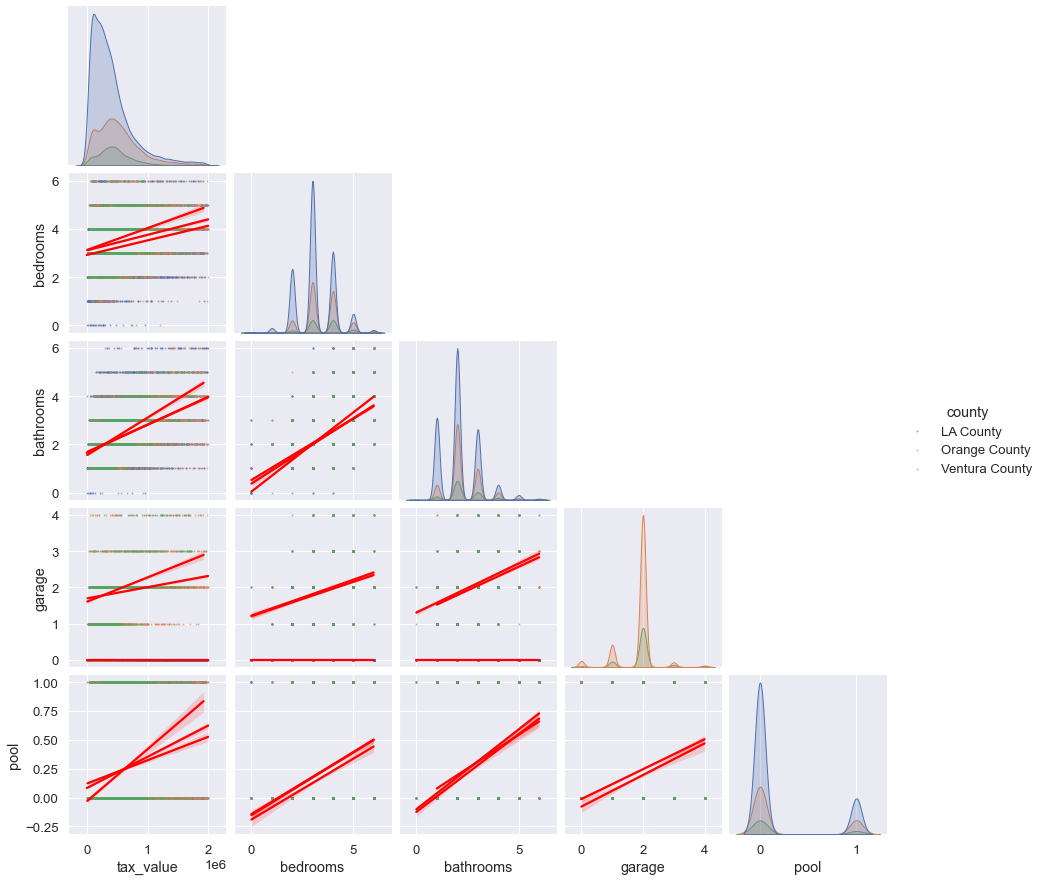

In [13]:
#pairplot on continuous Data (with tax value and county)
sns.pairplot(train[categorical_to_analyze], hue='county', corner = True, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}})

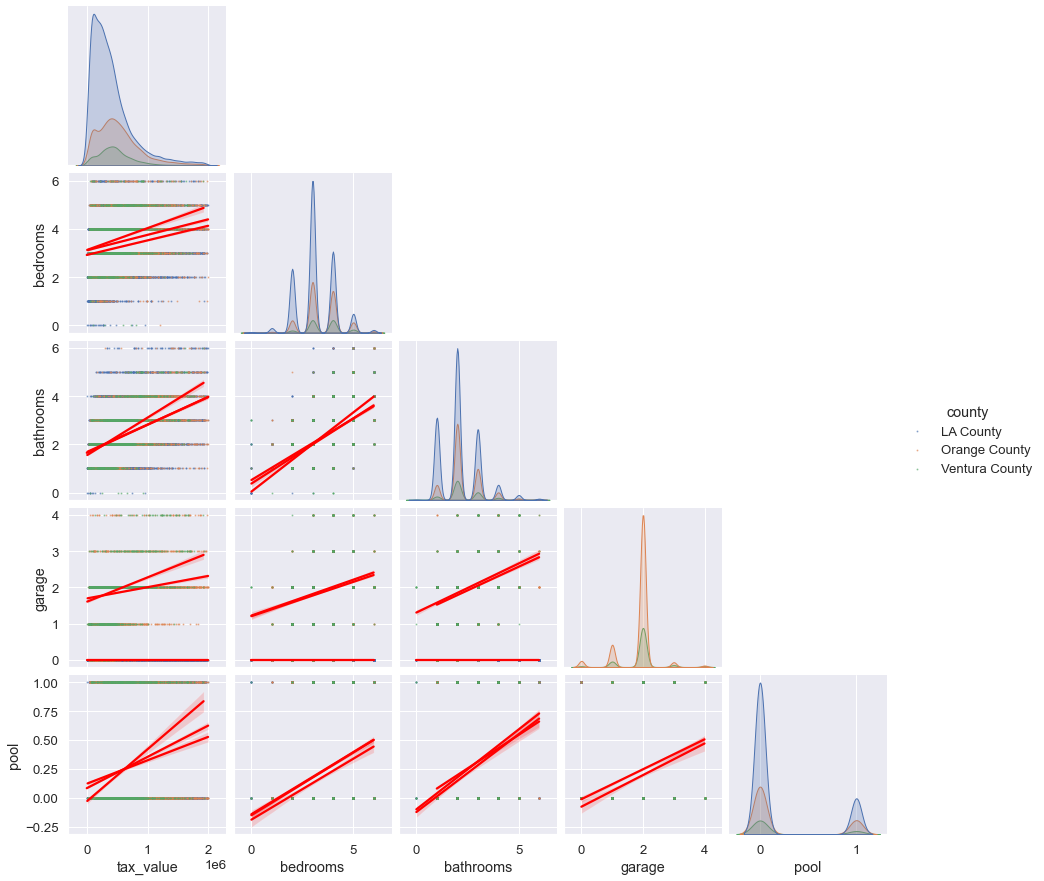

In [14]:
# Pairplot on categorical date with tax value
sns.pairplot(train[categorical_to_analyze], hue='county', corner = True, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}})

## Multivariate Analysis


- Regression analysis: Used to determine the relationship between a dependent variable and one or more independent variable.
- Analysis of Variance (ANOVA): Used to determine the relationship between collections of data by analyzing the difference in the means.
- Interdependent analysis: Used to determine the relationship between a set of variables among themselves.
- Discriminant analysis: Used to classify observations in two or more distinct set of categories.
- Classification and cluster analysis: Used to find similarity in a group of observations.
- Principal component analysis: Used to interpret data in its simplest form by introducing new uncorrelated variables.
- Factor analysis: Similar to principal component analysis, this too is used to crunch big data into small, interpretable forms.
- Canonical correlation analysis: Perhaps one of the most complex models among all of the above, canonical correlation attempts to interpret data by analyzing relationships between cross-covariance matrices.

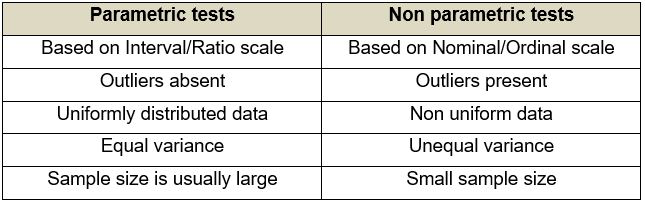
https://static.s4be.cochrane.org/app/uploads/2021/09/multivariate-blog.jpg
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [15]:
train_continuous = train[['square_feet','lot_size','year_built', 'tax_value','age']]

In [16]:
chi2, p, degf, expected = stats.chi2_contingency(train_continuous)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[5.56770104e+02 3.18177840e+03 5.92395673e+02 1.33621767e+05
  1.62892137e+01]
 [3.55736989e+03 2.03293291e+04 3.78499225e+03 8.53749232e+05
  1.04076634e+02]
 [2.77348339e+03 1.58496469e+04 2.95094788e+03 6.65620779e+05
  8.11427614e+01]
 ...
 [2.61559149e+02 1.49473409e+03 2.78295309e+02 6.27727591e+04
  7.65233775e+00]
 [1.76887673e+03 1.01086135e+04 1.88206032e+03 4.24520698e+05
  5.17513617e+01]
 [5.67492354e+02 3.24305293e+03 6.03803999e+02 1.36195048e+05
  1.66029106e+01]]
---

chi^2 = 2091455737.6040
p     = 0.0000


In [17]:
results = pd.DataFrame(columns=['Features','Chi2Weights'])

for i in range (len(train_continuous.columns)):
    chi2, p = stats.chisquare(train_continuous[train_continuous.columns[i]])
    results = results.append([pd.Series([train_continuous.columns[i], chi2], index=results.columns)], ignore_index = True)

In [18]:
results = results.sort_values(by = "Chi2Weights", ascending = False)
results.head(20)

,Features,Chi2Weights
1,lot_size,16114217470.699177
3,tax_value,7919238294.3362
0,square_feet,10398727.684904
4,age,271089.21413
2,year_built,7454.190411


In [19]:
chi_df = train[results["Features"].head(20)]
chi_df.head()

,lot_size,tax_value,square_feet,age,year_built
14733,2772,132267,913,32,1985
15170,6760,871083,1665,58,1959
21158,10650,672576,2033,68,1949
29556,6000,479243,2252,25,1992
3648,10526,686553,2552,48,1969


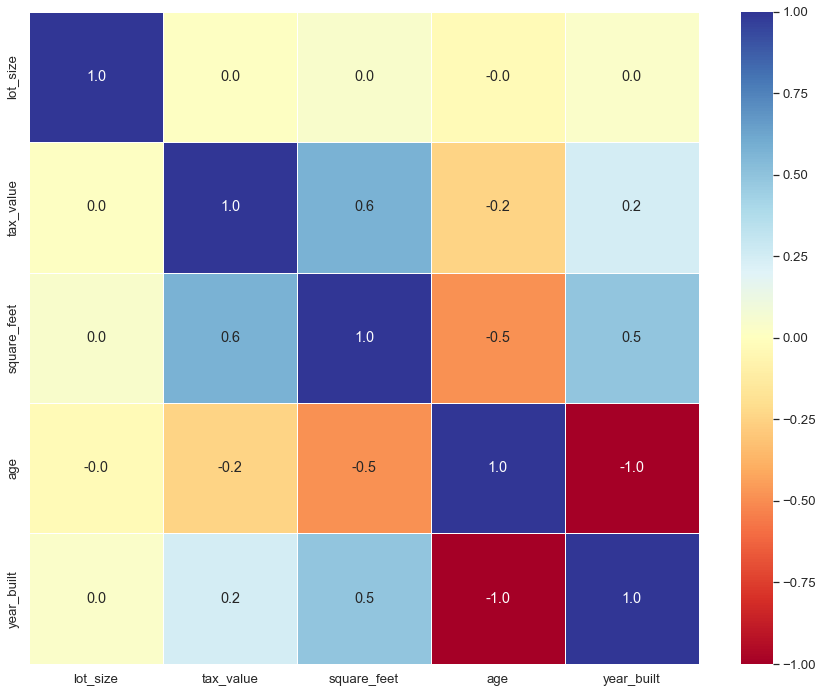

In [20]:
# Finding Correlation - Need to limit to continuous variables only
plt.figure(figsize = (15, 12))
sns.heatmap(chi_df.corr(), cmap="RdYlBu", annot=True, linewidth=0.5, fmt=".1f")

plt.show()

# Hypothesis Testing
   - Primary focus is on value as per the scope of project
- Ho1: There is no correlation between `bedrooms` and Value
- H02: There is no correlation between `bathrooms` and Value
- Ho3: There is no correlation between `square_feet` and Value
- Ho4: There is no correlation between `garage` and Value
- Ho5: There is no correlation between `age` and Value
- Ho6: There is no correlation between `lot_size` and Value
- Ho7: There is no correlation between `pool` and Value
- Ho8: There is no correlation between `living_space` and Value
- Ho9: There is no correlation between `county` and Value

In [21]:
#Look at numeric features vs target for continuous variables
combos = combinations(['tax_value','fed_code','square_feet','lot_size','year_built', 'age', 'living_space'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    explore.stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between tax_value  and fed_code of a property
We reject the null hypothesis, p = 2.6532601225054516e-62 | α = 0.05
  corr: 0.09887328347395374

H₀: There is no linear correlation between tax_value  and square_feet of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5717561656809462

H₀: There is no linear correlation between tax_value  and lot_size of a property
We reject the null hypothesis, p = 0.009119161850293519 | α = 0.05
  corr: 0.015514314239087668

H₀: There is no linear correlation between tax_value  and year_built of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.24372621807077355

H₀: There is no linear correlation between tax_value  and age of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: -0.24372621807077358

H₀: There is no linear correlation between tax_value  and living_space of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5817168635032559


In [22]:
#Look at numeric features vs target for categorical variables
combos = combinations(['tax_value','fed_code','bedrooms', 'bathrooms','garage', 'pool'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    explore.stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between tax_value  and fed_code of a property
We reject the null hypothesis, p = 2.6532601225054516e-62 | α = 0.05
  corr: 0.09887328347395374

H₀: There is no linear correlation between tax_value  and bedrooms of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.269780600804833

H₀: There is no linear correlation between tax_value  and bathrooms of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.477079690800461

H₀: There is no linear correlation between tax_value  and garage of a property
We reject the null hypothesis, p = 9.325196158908189e-231 | α = 0.05
  corr: 0.19119879632512393

H₀: There is no linear correlation between tax_value  and pool of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.23164180504929038

H₀: There is no linear correlation between fed_code  and bedrooms of a property
We reject the null hypothesis, p = 2.3634327127785293e-143 | α = 0.05
  corr: 0.1508173041

# EDA Results
#### Continuous data
- Living space is slightly higher correlated to tax value than square feet.
- Age and living space are highest correlation to value in continuous variables
- Living space has highest correlation at .58, year built = .24

#### Categorical data
- Strongest correlation: Bathroom (.47), Bedrooms(.26), and pool (.23)

#### Interration between other variables
- County (fed_code) has high correlation to garage (.74) and bathrooms.  Possible secondary influencer.

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Feature selection by algorithm
Testing Features based on Kbest and rfe.
 - goal is to compare algorithm to EDA

In [23]:
# Feature selection environment
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoLars, LinearRegression, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn

In [24]:
# Feature's to consider
X = train[['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built','fed_code','living_space']]
y= train.tax_value

In [25]:
#kbest
model.select_kbest(X, y, 3)

['bathrooms', 'square_feet', 'living_space']

In [26]:
# RFE
model.rfe(X,y,3)

['bathrooms', 'garage', 'pool']

## Feature Selection  Scaled 


In [27]:
# Look at columns
train.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built', 'tax_value', 'fed_code', 'age',
       'living_space', 'county'],
      dtype='object')

In [36]:
# To be encoded
to_dummy = ['county']
# Features to be scaled
features_to_scale = ['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size','age','living_space']
# Features fed into model based on exploration
columns_to_use = ['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size', 'year_built',
                  'fed_code', 'age','living_space']


In [37]:
# Test each county with each regression algorithm
def model_feature_selection(train, validate, test, to_dummy, features_to_scale, columns_to_use):
    """ Performs scaling and feature selection using recursive feature elimination. Performs operations on all three inputed data sets. Requires lists of features to encode (dummy), features to scale, and columns (features) to input to the feature elimination. """
    
    # Gets dummy variables
    X_train_exp = pd.get_dummies(train, columns = to_dummy, drop_first=True)
    
    # Gets dummy variables for validate and test sets as well for later use
    X_train = X_train_exp[columns_to_use]
    X_validate = pd.get_dummies(validate, columns = to_dummy, drop_first=True)[columns_to_use]
    X_test = pd.get_dummies(test, columns = to_dummy, drop_first=True)[columns_to_use]
    
    # Scale train, validate, and test sets using the scale_data function from wrangle.pu
    X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.scale_data2(X_train, X_validate, X_test,features_to_scale, scaler_type)
    
    # Set up the dependent variable in a datafrane
    y_train = train[['tax_value']]
    y_validate = validate[['tax_value']]
    y_test = test[['tax_value']]
    
    # Perform Feature Selection using Recursive Feature Elimination
    # Initialize ML algorithm
    lm = LinearRegression()
    # create RFE object - selects top 3 features only
    rfe = RFE(lm, n_features_to_select=3)
    # fit the data using RFE
    rfe.fit(X_train_scaled, y_train)
    # get mask of columns selected
    feature_mask = rfe.support_
    # get list of column names
    rfe_features = X_train_scaled.iloc[:,feature_mask].columns.tolist()
    # view list of columns and their ranking

    # get the ranks
    var_ranks = rfe.ranking_
    # get the variable names
    var_names = X_train_scaled.columns.tolist()
    # combine ranks and names into a df for clean viewing
    rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
    # sort the df by rank
    rfe_ranks_df.sort_values('Rank')

    return X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features
    
def model(X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features, show_test = False, print_results = True):
    """ Fits data to different regression algorithms and evaluates on validate (and test if desired for final product). Outputs metrics for each algorithm (r2, rmse) as a Pandas DataFrame. """
    
    ### BASELINE
    
    # 1. Predict tax_value_pred_mean
    tax_value_pred_mean = y_train['tax_value'].mean()
    y_train['tax_value_pred_mean'] = tax_value_pred_mean
    y_validate['tax_value_pred_mean'] = tax_value_pred_mean

    # 2. compute tax_value_pred_median
    tax_value_pred_median = y_train['tax_value'].median()
    y_train['tax_value_pred_median'] = tax_value_pred_median
    y_validate['tax_value_pred_median'] = tax_value_pred_median

    # 3. RMSE of tax_value_pred_mean
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)
    if print_results:
        print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
          "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

    # 4. RMSE of tax_value_pred_median
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

    if print_results:

        print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
          "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

    ### OLS Linear Regression
    
    # create the model object
    lm = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm.fit(X_train_scaled, y_train.tax_value)

    # predict train
    y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

    # predict validate
    y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

    if print_results:
        print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)
    
    # predict test
    if show_test:
        
        y_test['tax_value_pred_lm'] = lm.predict(X_test_scaled)
        rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm)**(1/2)

    # Lasso-Lars
    
    # create the model object
    lars = LassoLars(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lars.fit(X_train_scaled, y_train.tax_value)

    # predict train
    y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

    # predict validate
    y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

    if print_results:

        print("RMSE for OLS using LarsLasso\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

    # predict test
    if show_test:
        
        y_test['tax_value_pred_lars'] = lars.predict(X_test_scaled)
        rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lars)**(1/2)

    # Tweedie
    
    # create the model object
    glm = TweedieRegressor(power=1, alpha=0)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    glm.fit(X_train_scaled, y_train.tax_value)

    # predict train
    y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

    # predict validate
    y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)
    
    if print_results:
        print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)
        
    # predict test
    if show_test:
        
        y_test['tax_value_pred_glm'] = glm.predict(X_test_scaled)
        rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_glm)**(1/2)

    # Polynomial features
    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2,interaction_only=True)

    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train_scaled)

    # transform X_validate_scaled & X_test_scaled
    X_validate_degree2 = pf.transform(X_validate_scaled)
    X_test_degree2 = pf.transform(X_test_scaled)
    
    # create the model object
    lm2 = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_degree2, y_train.tax_value)

    # predict train
    y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

    # predict validate
    y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)
    
    if print_results:
        print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)
        
    # predict test
    if show_test:
        
        y_test['tax_value_pred_lm2'] = lm2.predict(X_test_degree2)
        rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm2)**(1/2)

    results = pd.concat([
    y_validate.apply(lambda col: r2_score(y_validate.tax_value, col)).rename('r2'),
    y_validate.apply(lambda col: mean_squared_error(y_validate.tax_value, col)).rename('mse'),
    ], axis=1).assign(
        rmse=lambda df: df.mse.apply(lambda x: x**0.5)
    )
    if show_test:
        results = pd.concat([
        y_train.apply(lambda col: r2_score(y_train.tax_value, col)).rename('r2_train'),
        y_train.apply(lambda col: mean_squared_error(y_train.tax_value, col)).rename('mse_train'),
        y_validate.apply(lambda col: r2_score(y_validate.tax_value, col)).rename('r2_validate'),
        y_validate.apply(lambda col: mean_squared_error(y_validate.tax_value, col)).rename('mse_validate'),
        y_test.apply(lambda col: r2_score(y_test.tax_value, col)).rename('r2_test'),
        y_test.apply(lambda col: mean_squared_error(y_test.tax_value, col)).rename('mse_test'),
        ], axis=1).assign(
            rmse_validate=lambda df: df.mse_validate.apply(lambda x: x**0.5)
        )
        
        results = results.assign(rmse_train= lambda results: results.mse_train.apply(lambda x: x**0.5))
        results = results.assign(rmse_test= lambda results: results.mse_test.apply(lambda x: x**0.5))

In [38]:
# Test each county with each regression algorithm
all_results = {}
for county in set(train.county):
    print(county)
    
    train_sample = train[train.county == county]
    validate_sample = validate[validate.county == county]
    test_sample = test[test.county == county]

    X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features = model_feature_selection(train_sample, validate_sample, test_sample, to_dummy, features_to_scale, columns_to_use)
    
    print(rfe_features)
    all_results[county]=model(X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features)

LA County
Invalid scaler entry, using MinMax
['bedrooms_scaled', 'square_feet_scaled', 'living_space_scaled']
RMSE using Mean
Train/In-Sample:  346881.43 
Validate/Out-of-Sample:  351477.16
RMSE using Median
Train/In-Sample:  358628.99 
Validate/Out-of-Sample:  363778.23
RMSE for OLS using LinearRegression
Training/In-Sample:  289740.5427716802 
Validation/Out-of-Sample:  292019.4138128303
RMSE for OLS using LarsLasso
Training/In-Sample:  289955.1485773532 
Validation/Out-of-Sample:  292272.92718312657
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  346881.43002830434 
Validation/Out-of-Sample:  351477.15919312387
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1873493.2320560953 
Validation/Out-of-Sample:  1884295.7660482319
Ventura County
Invalid scaler entry, using MinMax
['bedrooms_scaled', 'square_feet_scaled', 'living_space_scaled']
RMSE using Mean
Train/In-Sample:  306251.78 
Validate/Out-of-Sample:  310026.26
RMSE using Median
Train/In-Sample:  3096

In [40]:
# Test all counties together    
train_sample = train
validate_sample = validate
test_sample = test

X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features = model_feature_selection(train_sample, validate_sample, test_sample, to_dummy, features_to_scale, columns_to_use)

print(rfe_features)
# all_results.append(model(X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test, rfe_features))

Invalid scaler entry, using MinMax
['bedrooms_scaled', 'square_feet_scaled', 'living_space_scaled']


In [41]:
# Perform Feature Selection using Recursive Feature Elimination
# Initialize ML algorithm
lm = LinearRegression()
# create RFE object - selects top 3 features only
rfe = RFE(lm, n_features_to_select=3)
# fit the data using RFE
rfe.fit(X_train_scaled, y_train)
# get mask of columns selected
feature_mask = rfe.support_
# get list of column names
rfe_features = X_train_scaled.iloc[:,feature_mask].columns.tolist()
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
2,bedrooms_scaled,1
4,square_feet_scaled,1
9,living_space_scaled,1
3,bathrooms_scaled,2
7,lot_size_scaled,3
5,garage_scaled,4
6,pool_scaled,5
0,year_built,6
1,fed_code,7
8,age_scaled,8


In [42]:
X_train_scaled = X_train_scaled[rfe_features]
X_validate_scaled = X_validate_scaled[rfe_features]
X_test_scaled = X_test_scaled[rfe_features]

In [43]:
X_train_scaled.head()

,bedrooms_scaled,square_feet_scaled,living_space_scaled
14733,0.333333,0.092494,0.167962
15170,0.500000,0.181101,0.236085
21158,0.333333,0.224461,0.306183
29556,0.500000,0.250265,0.303591
3648,0.666667,0.285613,0.315932


In [44]:
predictions = pd.DataFrame({
    'actual': validate.tax_value
})

#### Baseline creation

In [45]:
# 1. Predict tax_value_pred_mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# 2. compute tax_value_pred_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  352324.75 
Validate/Out-of-Sample:  357931.84
RMSE using Median
Train/In-Sample:  361008.51 
Validate/Out-of-Sample:  367543.49


#### Linear Regression Model

In [52]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  285376.4632759057 
Validation/Out-of-Sample:  285570.3026332019


#### LassoLars

In [47]:
# create the model object
lars = LassoLars(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for OLS using LarsLasso\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LarsLasso
Training/In-Sample:  285719.26005112746 
Validation/Out-of-Sample:  285867.9019088987


#### Tweedie

In [48]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  296193.4089495552 
Validation/Out-of-Sample:  298640.3009232536


#### Polynomial

In [49]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2,interaction_only=False)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [50]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  284745.1709753608 
Validation/Out-of-Sample:  285246.23423949385


#### Visual for Model Comparison

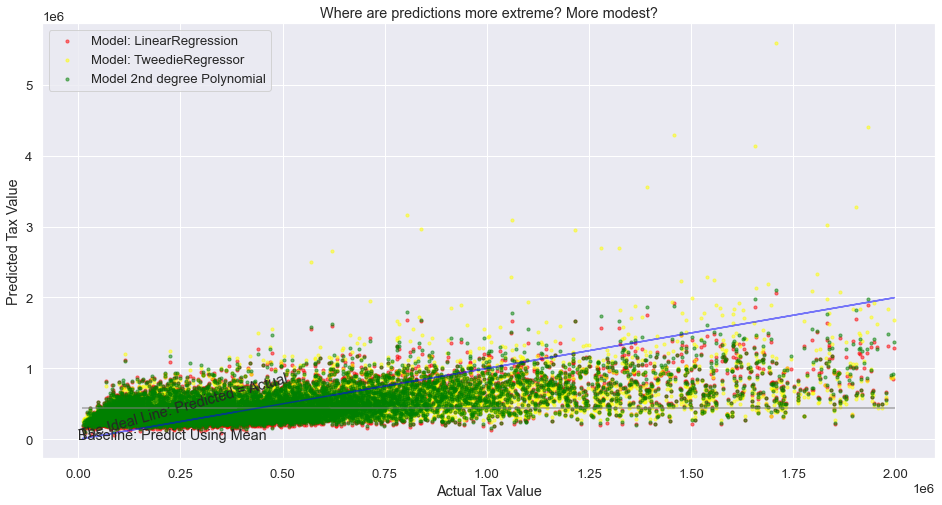

In [53]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, color="red", s=10, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
            alpha=.5, color="yellow", s=10, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="green", s=10, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

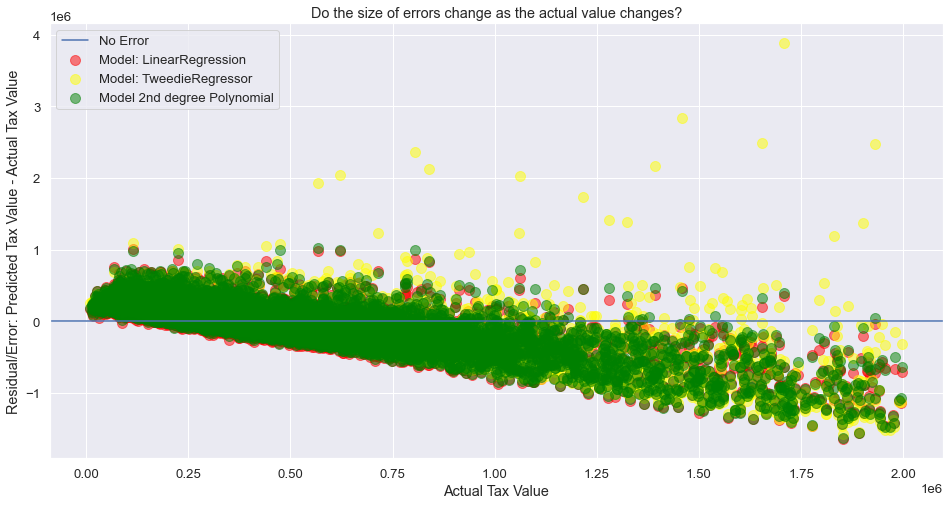

In [54]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm-y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm-y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2-y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

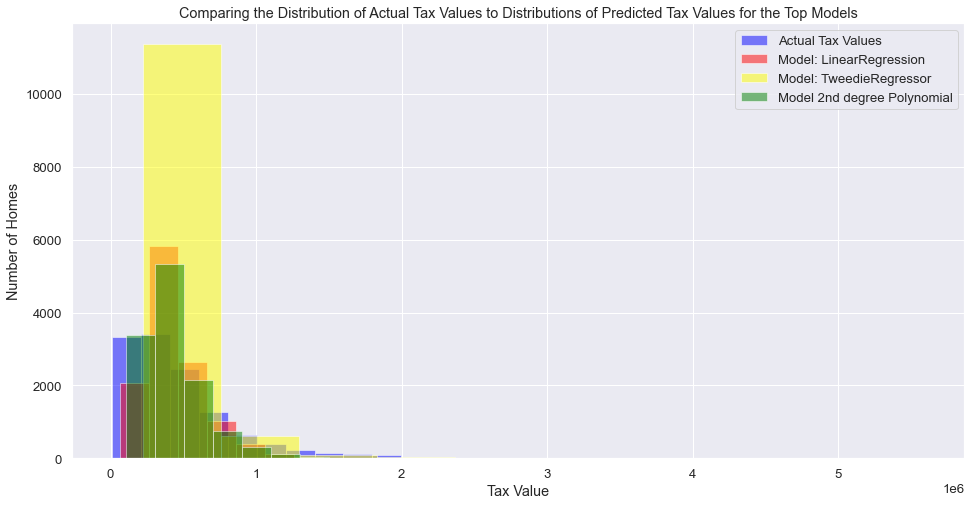

In [60]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Tax Values")
plt.hist(y_validate.tax_value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_value_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

In [57]:
y_validate

,tax_value,tax_value_pred_mean,tax_value_pred_median,tax_value_pred_lars,tax_value_pred_glm,tax_value_pred_lm2,tax_value_pred_lm
32305,618629,442782.643762,364078.0,557780.145277,472585.272849,535242.621605,537396.982085
17820,627702,442782.643762,364078.0,384772.335938,378392.296804,386001.651215,396488.330780
28414,830063,442782.643762,364078.0,796334.340818,719983.600464,771061.458443,787349.008536
75,313973,442782.643762,364078.0,334917.459241,346581.504008,327653.508634,330558.962136
1436,71577,442782.643762,364078.0,373343.379191,369003.851305,368042.170519,376051.536418
...,...,...,...,...,...,...,...
30189,695446,442782.643762,364078.0,208893.092851,268515.337975,223306.925822,194875.069134
30967,52344,442782.643762,364078.0,257507.799443,311191.061116,253603.492869,258715.348284
38902,389492,442782.643762,364078.0,287118.384470,327284.597908,288080.071211,296026.443409
26981,264234,442782.643762,364078.0,360671.335238,362554.455337,356368.565806,364290.660129


In [59]:
pd.concat([
    y_validate.apply(lambda col: r2_score(y_validate.tax_value, col)).rename('r2'),
    y_validate.apply(lambda col: mean_squared_error(y_validate.tax_value, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(lambda x: x**0.5)
)

,r2,mse,rmse
tax_value,1.000000,0.000000e+00,0.000000
tax_value_pred_mean,-0.000191,1.281152e+11,357931.835656
tax_value_pred_median,-0.054629,1.350882e+11,367543.487105
tax_value_pred_lars,0.362011,8.172046e+10,285867.901909
tax_value_pred_glm,0.303728,8.918603e+10,298640.300923
tax_value_pred_lm2,0.364783,8.136541e+10,285246.234239
tax_value_pred_lm,0.363339,8.155040e+10,285570.302633


# End Results
Take aways from this EDA

- Living space and bathrooms are highest correlation from EDA and by algorithm.
- Square_feet, garage, and pool were also selected as key variables in both EDA and algorithm

## Next Steps
Modeling based on key features
- 'bathrooms','living_space','garage', 'pool'
- Bedrooms will be added to key features
    - While not identified as a key variable by EDA and algorithm, it is still a valuable factor for consideration.

## Modeling